### Inverse Cumuklative Distribution Functions (CDFs) of:
* Exponential
* Weibull
* Uniform (or other distribution of your choise)
* "Inverse Pyramid"

In [13]:
import matplotlib.pyplot as plt
import scipy
import scipy.stats as sp
import numpy as np
import seaborn as sns
# Exponential
# I believe it is expon.ppf()
#Weibull is weibull_min.ppf()
#Uniform is ppf()





### Random Numbers
* Generate random uniform (0,1) numbers and use the inverse CDF functions to create random numbers for each of the distributions. Repeat this at least 50,000 times for each distribution.

In [14]:
# This outputs n amount of numbers between 0 and 1.
def genNums(n):
    return np.random.uniform(0,1,n)

## Using random numbers to generate numbers in a distribution
 This example here uses the normal distribution. We first generate random numbers above, and then use in the ppf function to create a dataset of random numbers in a normal distribution. We graph them on a histogram to show it fits the distribution.

NameError: name 'rannums' is not defined

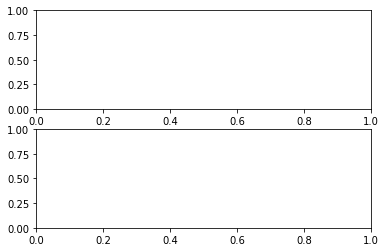

In [15]:
# Working on Normal Distribution
fix, axs = plt.subplots(2, 1)
mean, var, skew, kurt = sp.norm.stats(moments='mvsk')
normNums = []
for num in rannums:
    normNums.append(sp.norm.ppf(num))
rv = sp.norm()
axs[0].hist(rannums, density=True, histtype='stepfilled', alpha=0.2)
axs[1].hist(normNums, density=True, histtype='stepfilled', alpha=0.2)
axs[1].plot(normNums, rv.pdf(normNums), alpha=0.6)
plt.show()

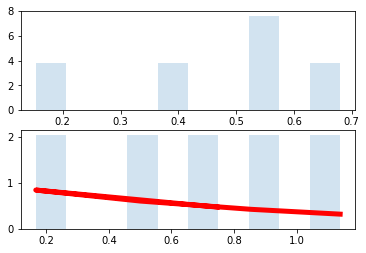

In [305]:
# Exponential
fix, axs = plt.subplots(2,1)
exponNums = []
for num in rannums:
    exponNums.append(sp.expon.ppf(num))

rv = sp.expon()

axs[0].hist(rannums, density=True, histtype='stepfilled', alpha=0.2)
axs[1].hist(exponNums, density=True, histtype='stepfilled', alpha=0.2)
axs[1].plot(exponNums, sp.expon.pdf(exponNums), 'r-', lw=5, label='frozen pdf')
axs[1].plot(exponNums, rv.pdf(exponNums), 'r-', lw=2, label='frozen pdf')

NameError: name 'set_fillstyle' is not defined

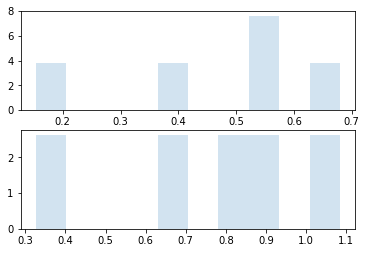

In [306]:
#Weibull
fix, axs = plt.subplots(2,1)
c = 1.60
weibulls = []
for num in rannums:
    weibulls.append(sp.weibull_min.ppf(num, c))
axs[0].hist(rannums, density=True, histtype='stepfilled', alpha=0.2)
axs[1].hist(weibulls, density=True, histtype='stepfilled', alpha=0.2)
axs[1].plot(weibulls, sp.weibull_min.pdf(weibulls, c), set_fillstyle)



In [224]:
# Uniform
# fix, axs = plt.subplots(2,1)
uniforms = []
for num in rannums:
    uniforms.append(sp.uniform.ppf(num))

# axs[0].hist(rannums, density=True, histtype='stepfilled', alpha=0.2)
# axs[1].hist(uniforms, density=True, histtype='stepfilled', alpha=0.2)a
# axs[1].plot(uniforms, sp.uniform.pdf(uniforms))

## Generate all data sets from random variables
Here we simply just create the arrays from the random numbers. The code blocks above are the individual versions, along with a way to print out the histogram after its changed to confirm its working.

In [8]:
# Generate all data sets TRIANGLE currently unused/unimplemented
# Where n is the amount of numbers between 0 and 1 generated.
uniforms = []
weibulls = [] #!! In order to keep information flowing
exponNums = []
c = 1.69 # Shape factor for the weibull
def genDataSet(uniformNums, weibullNums, exponNums,n):
    rannums = genNums(n)
    for num in rannums:
        uniformNums.append(sp.uniform.ppf(num))
        weibullNums.append(sp.weibull_min.ppf(num, c))
        exponNums.append(sp.expon.ppf(num))

## Modify/Process the Data
In this section we generate sample averages of size n = 5, 30 and 100

### n = 100

In [27]:
# Distro Class is a way that we can store the entire datasets of our distributions while 
class Distro:
    def __init__(self):
        self.exMeans = []
        self.uniMeans = []
        self.weiMeans = []
# takeStats will create a dataset of n numbers in each distribution, and will find the mean and add it to the array in Distro. 
# It willd do this p times for p Means in each array.
def takeStats(n, p):
    distroSet = Distro()
    for i in range(p):
        uniforms = []
        weibulls = []
        exponNums = []
        genDataSet(uniforms, weibulls, exponNums, n)
        distroSet.exMeans.append(scipy.mean(exponNums))
        distroSet.uniMeans.append(scipy.mean(uniforms))
        distroSet.weiMeans.append(scipy.mean(weibulls))
    return distroSet

# Create the "parent" distro graphs for the first row.
uniforms = []
weibulls = []
exponNums = []
genDataSet(uniforms, weibulls, exponNums, 50000)
## ## asdasdasdasdasdasdaasdfasdfasadasdaasdasdasdasdasdasdasdasdasdasdasdasdasdasdasdasdasd

distro1 = takeStats(100, 5000)
distro2 = takeStats(30, 5000)
distro3 = takeStats(5, 5000)
print(distro1.exMeans[0])





0.9755062096427064


/home/ddeniro/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


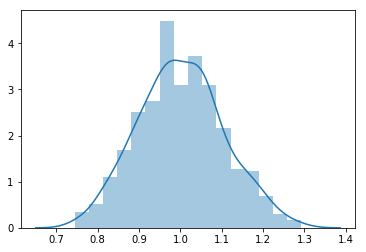

In [309]:
fix, axs = plt.subplots(1,1)
sns.distplot(distro1.exMeans)

## Making the final section
Here is some of the code required to render the data on a 4x4 area

Here we use seaborn to draw the histogram as well as trendline. We assign them to each corresponding a

/home/ddeniro/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/ddeniro/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/home/ddeniro/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/ddeniro/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:815: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Distro 1: takeStats(100, 500)
	Exponential Mean: 0.9982268170206662
	Weibull Mean: 0.891669044306355
	Uniform Mean: 0.49950124669404583
Distro 2: takeStats(30, 500)
	Exponential Mean: 0.9980730525052542
	Weibull Mean: 0.892074201230576
	Uniform Mean: 0.5000233687680598
Distro 3: takeStats(5, 500)
	Exponential Mean: 1.007297644413266
	Weibull Mean: 0.8966453071012951
	Uniform Mean: 0.502131566021633


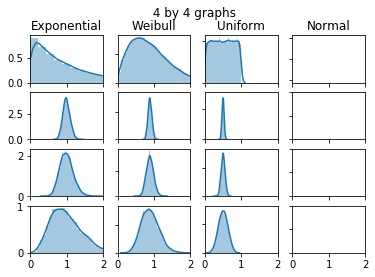

In [28]:

fig, axs = plt.subplots(4,4)
fig.suptitle(' 4 by 4 graphs')
for ax in axs.flat:
    ax.label_outer()
    ax.set(xlim=(0,2))
    

#First row "parent" functions
sns.distplot(exponNums, ax=axs[0,0])
axs[0,0].set_title('Exponential')
sns.distplot(weibulls, ax=axs[0,1])
axs[0,1].set_title('Weibull')
sns.distplot(uniforms, ax=axs[0,2])
axs[0,2].set_title('Uniform')
sns.distplot(normNums, ax=axs[0,3])
axs[0,3].set_title('Normal')

sns.distplot(distro1.exMeans, ax=axs[1,0])
sns.distplot(distro2.exMeans, ax=axs[2,0])
sns.distplot(distro3.exMeans, ax=axs[3,0])

sns.distplot(distro1.weiMeans, ax=axs[1,1])
sns.distplot(distro2.weiMeans, ax=axs[2,1])
sns.distplot(distro3.weiMeans, ax=axs[3,1])

sns.distplot(distro1.uniMeans, ax=axs[1,2])
sns.distplot(distro2.uniMeans, ax=axs[2,2])
sns.distplot(distro3.uniMeans, ax=axs[3,2])

print(f'Distro 1: takeStats(100, 500)')
print(f'\tExponential Mean: {scipy.mean(distro1.exMeans)}')
print(f'\tWeibull Mean: {scipy.mean(distro1.weiMeans)}')
print(f'\tUniform Mean: {scipy.mean(distro1.uniMeans)}')
print(f'Distro 2: takeStats(30, 500)')
print(f'\tExponential Mean: {scipy.mean(distro2.exMeans)}')
print(f'\tWeibull Mean: {scipy.mean(distro2.weiMeans)}')
print(f'\tUniform Mean: {scipy.mean(distro2.uniMeans)}')
print(f'Distro 3: takeStats(5, 500)')
print(f'\tExponential Mean: {scipy.mean(distro3.exMeans)}')
print(f'\tWeibull Mean: {scipy.mean(distro3.weiMeans)}')
print(f'\tUniform Mean: {scipy.mean(distro3.uniMeans)}')


## Conclusions/Observations

As we increase in n, but keep p a constant it appears to approach a certain value. It appears that it can be quite accurate however even with just 5 samples.
```txt
Distro 1: takeStats(100, 500)
	Exponential Mean: 0.9963254163773608
	Weibull Mean: 0.8908399049235275
	Uniform Mean: 0.4991011737163576
Distro 2: takeStats(30, 500)
	Exponential Mean: 1.0120279281896885
	Weibull Mean: 0.8979927529819759
	Uniform Mean: 0.5020358760873931
Distro 3: takeStats(5, 500)
	Exponential Mean: 0.9923008484043381
	Weibull Mean: 0.8911992209114222
	Uniform Mean: 0.50008304265203
```
```
Distro 1: takeStats(100, 50000)
	Exponential Mean: 0.9982268170206662
	Weibull Mean: 0.891669044306355
	Uniform Mean: 0.49950124669404583
Distro 2: takeStats(30, 50000)
	Exponential Mean: 0.9980730525052542
	Weibull Mean: 0.892074201230576
	Uniform Mean: 0.5000233687680598
Distro 3: takeStats(5, 50000)
	Exponential Mean: 1.007297644413266
	Weibull Mean: 0.8966453071012951
	Uniform Mean: 0.502131566021633
```